In [1]:
%matplotlib inline
import numpy
from ecell4 import *

In [2]:
D = 1.  # 0.01
radius = 0.005
simrun = 10  # a number of samples
rng = GSLRandomNumberGenerator()
#rng.seed(0)
#y0 =
duration = 100
T = numpy.linspace(0, duration, 100)
V = 1.
Vr = V*(1e-6)**3
NA = 6.02e23
ka = 3e9 / (NA*Vr*1000)
kd = 21.5
kp = 89.55
kdec =0.04
print 'ka',ka
dt = 2*radius*radius/3./D
pacc = ka/6./(2**0.5)/D/radius
print 'pacc',pacc,dt/pacc

ka 4.98338870432
pacc 117.459598204 1.41892760758e-07


In [3]:
with species_attributes():
    A | {'radius': str(radius), 'D': str(D)}
    B | {'radius': str(radius), 'D': '0.0'}
    C | {'radius': str(radius), 'D': str(D)}
    P | {'radius': str(radius), 'D': str(D)}
    AB | {'radius': str(radius), 'D': '0.0'}

with reaction_rules():
    A + B == C | (ka,kd)
    C > P+AB | kp
    AB > A + B | 10000.
    P > ~P | kdec

m = get_model()

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


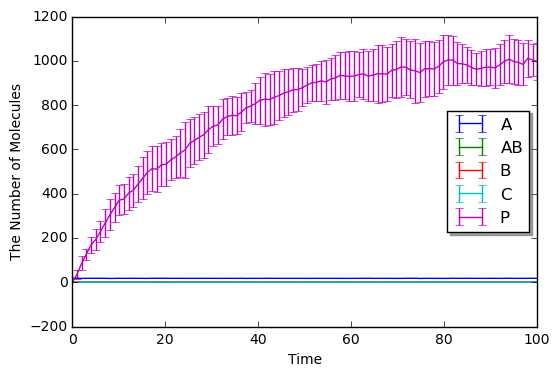

In [4]:
ensemble_simulations(simrun,T, model=m,y0= {'A': 18,'B':1}, solver=('spatiocyte',radius),volume=V)
